In [ ]:

from google.colab import drive
drive.mount( '/content/gdrive' )

Mounted at /content/gdrive


In [ ]:

import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
imagegen = ImageDataGenerator()
# data loading-trening i validation
train = imagegen.flow_from_directory("/content/gdrive/My Drive/Baza_train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(60, 90))
val = imagegen.flow_from_directory("/content/gdrive/My Drive/Baza_val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(60, 90))

Found 2680 images belonging to 40 classes.
Found 376 images belonging to 40 classes.


In [ ]:
#save best model(with the slightest mistake on validation data)
Check_Point = ModelCheckpoint( 'CNN_vl.h5',   
                               monitor='val_loss',
                               save_best_only=True,
                               verbose=1,
                               mode='auto',
                               save_weights_only=False,
                               save_freq='epoch' )
#save best model ( with the greatest accuracy on validation data )
Check_Point_acc = ModelCheckpoint( 'CNN_va.h5',   
                               monitor='val_accuracy',
                               save_best_only=True,
                               verbose=1,
                               mode='auto',
                               save_weights_only=False,
                               save_freq='epoch' )
#early stopping
Early_Stopping = EarlyStopping( monitor='val_loss',
                                min_delta=0.001,
                                patience= 10,
                                verbose=1,
                                mode='auto',
                                baseline=None,
                                restore_best_weights=True )

In [ ]:
#model forming
model = Sequential()
#expected image in the input with dimensions 60x90
model.add(InputLayer(input_shape=(60, 90, 3)))

# first Conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# second Conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# third Conv blok
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
#output layer
model.add(Dense(units=40, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# trening neural network
History = model.fit_generator(train, epochs=200, validation_data=val, callbacks=[ Check_Point, Early_Stopping ])
# saving final model on GoogleDrive
model.save("/content/gdrive/My Drive/final_model_char.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
21/21 [==============================] - 871s 40s/step - loss: 3.9178 - accuracy: 0.0377 - val_loss: 6.6586 - val_accuracy: 0.0372

Epoch 00001: val_loss improved from inf to 6.65856, saving model to CNN_vl.h5
Epoch 2/200
21/21 [==============================] - 5s 255ms/step - loss: 2.8970 - accuracy: 0.2687 - val_loss: 3.9586 - val_accuracy: 0.1835

Epoch 00002: val_loss improved from 6.65856 to 3.95864, saving model to CNN_vl.h5
Epoch 3/200
21/21 [==============================] - 5s 252ms/step - loss: 1.9042 - accuracy: 0.5437 - val_loss: 2.4997 - val_accuracy: 0.3112

Epoch 00003: val_loss improved from 3.95864 to 2.49966, saving model to CNN_vl.h5
Epoch 4/200
21/21 [==============================] - 5s 252ms/step - loss: 1.1887 - accuracy: 0.7213 - val_loss: 1.3598 - val_accuracy: 0.5957

Epoch 00004: val_loss improved from 2.49966 to 1.35979, saving model to CNN_vl.h5
Epoch 5/200
21/21 [==============================] - 5s 250ms/step - loss: 0.6588 - accuracy: 0.8549

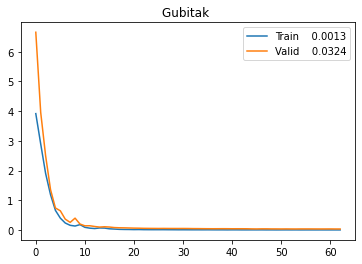

In [ ]:
#Loss on training and validation data
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(20)

plt.subplot( )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train'+"{:10.4f}".format( min(History.history['loss']) ) )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Valid'+"{:10.4f}".format( min(History.history['val_loss']) ) )
plt.legend( loc='upper right' )
plt.title( 'Gubitak ')
plt.show()

In [ ]:
#Accuracy on training and validation data
Train_Acc = History.history['accuracy']
Val_Acc = History.history['val_accuracy']
epochs_range = range(20)

plt.subplot( )
plt.plot( range( len(Train_Acc) ), Train_Acc, label='Train'+"{:10.4f}".format( min(History.history['accuracy']) ) )
plt.plot( range( len(Val_Acc) ), Val_Acc, label='Valid'+"{:10.4f}".format( min(History.history['val_accuracy']) ) )
plt.legend( loc='down right' )
plt.title( 'Tacnost ')
plt.show()